In [ ]:
!pip install datasets

In [ ]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
from datasets import Dataset
import matplotlib.pyplot as plt
pd.set_option(
    "display.max_colwidth", None
)

In [ ]:
import  datasets
from datasets import load_dataset
ds = datasets.load_dataset("text", data_files="dataset.rtf" , split="train")

In [ ]:
ds

Dataset({
    features: ['text'],
    num_rows: 210
})

In [ ]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.0/974.0 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 21.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
from langchain.docstore.document import Document as LangchainDocument
RAW_KNOWLEDGE_BASE = [
    LangchainDocument(page_content=doc["text"])
    for doc in tqdm(ds)
]

  0%|          | 0/210 [00:00<?, ?it/s]

In [ ]:
print(RAW_KNOWLEDGE_BASE)

[Document(page_content='\ufeffCricket, England’s national summer sport, which is now played throughout the world, particularly in Australia, India, Pakistan, the West Indies, and the British Isles.'), Document(page_content=''), Document(page_content='Cricket field:'), Document(page_content='Location of wickets and principal fielding positions on a cricket field.'), Document(page_content='Cricket is played with a bat and ball and involves two competing sides (teams) of 11 players. The field is oval with a rectangular area in the middle, known as the pitch, that is 22 yards (20.12 metres) by 10 feet (3.04 metres) wide. Two sets of three sticks, called wickets, are set in the ground at each end of the pitch. Across the top of each wicket lie horizontal pieces called bails. The sides take turns at batting and bowling (pitching); each turn is called an “innings” (always plural). Sides have one or two innings each, depending on the prearranged duration of the match, the object being to score

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
MARKDOWN_SEPARATORS = [
    "\n#{1,6} " ,
    "```\n" ,
    "\n\\*\\*\\*+\n" ,
    "\n---+\n" ,
    "\n___+\n" ,
    "\n\n",
    "\n",
    " ",
    "",
]
text_splitter= RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100,
    add_start_index=True,
    strip_whitespace=True,
    separators=MARKDOWN_SEPARATORS,
)
docs_processed = []
for doc in RAW_KNOWLEDGE_BASE:
    docs_processed += text_splitter.split_documents([doc])

In [ ]:
print(docs_processed)

[Document(page_content='\ufeffCricket, England’s national summer sport, which is now played throughout the world, particularly in Australia, India, Pakistan, the West Indies, and the British Isles.', metadata={'start_index': 0}), Document(page_content='Cricket field:', metadata={'start_index': 0}), Document(page_content='Location of wickets and principal fielding positions on a cricket field.', metadata={'start_index': 0}), Document(page_content='Cricket is played with a bat and ball and involves two competing sides (teams) of 11 players. The field is oval with a rectangular area in the middle, known as the pitch, that is 22 yards (20.12 metres) by 10 feet (3.04 metres) wide. Two sets of three sticks, called wickets, are set in the ground at each end of the pitch. Across the top of each wicket lie horizontal pieces called bails. The sides take turns at batting and bowling (pitching); each turn is called an “innings” (always plural). Sides have one or two innings each, depending on the 

In [ ]:
print(len(docs_processed))

139


In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 6.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Model's maximum sequence length: 512


  0%|          | 0/139 [00:00<?, ?it/s]

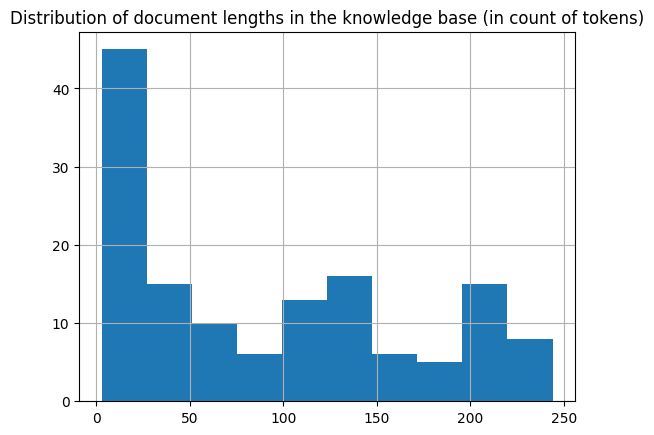

In [ ]:
from sentence_transformers import SentenceTransformer
print(
    f"Model's maximum sequence length: {SentenceTransformer('thenlper/gte-small').max_seq_length}"
)
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]
fig= pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

  0%|          | 0/181 [00:00<?, ?it/s]

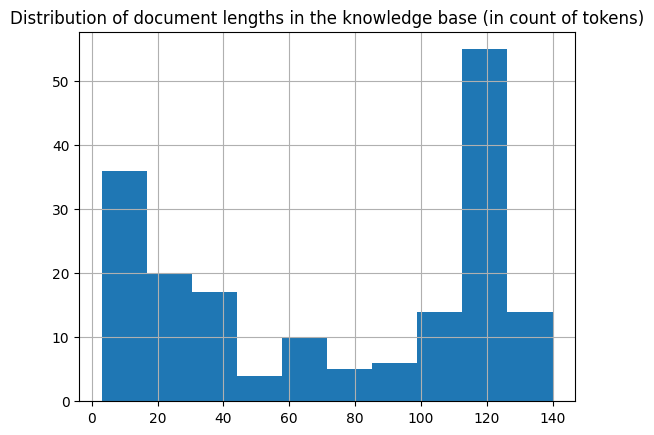

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer
EMBEDDING_MODEL_NAME = "thenlper/gte-small"
def split_documents(
    chunk_size: int,
    knowledge_base: List[LangchainDocument],
    tokenizer_name: Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument]:

    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size / 10),
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )
    docs_processed = []
    for doc in knowledge_base:
        docs_processed += text_splitter.split_documents([doc])
    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
       if doc.page_content not in unique_texts:
           unique_texts[doc.page_content]= True
           docs_processed_unique.append(doc)
    return docs_processed_unique

docs_processed = split_documents(
    512,
    RAW_KNOWLEDGE_BASE,
    tokenizer_name=EMBEDDING_MODEL_NAME,
)
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(EMBEDDING_MODEL_NAME)
lengths= [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

In [ ]:
# Install faiss-cpu
!pip install faiss-cpu

# Verify installation
import faiss
print(faiss.__version__)




1.8.0


In [ ]:

!pip install faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.9 MB/s eta 0:00:00


In [ ]:
!pip install -U langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.1 MB/s eta 0:00:00


In [ ]:
import torch
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy

# Check if CUDA is available
if torch.cuda.is_available():
    device = "cuda:0"  # Use GPU
    print("CUDA is available. Using GPU.")
else:
    device = "cpu"  # Fallback to CPU
    print("CUDA is not available. Using CPU.")

embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process=True,
    model_kwargs={"device": device},
    encode_kwargs={"normalize_embeddings": True},
)

# Assuming docs_processed contains your processed documents
KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(
    docs_processed, embedding_model, distance_strategy=DistanceStrategy.COSINE
)

CUDA is available. Using GPU.


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(


In [ ]:
user_query = "How many balls are in an over?"

In [ ]:
print(f"\nStarting retrieval for {user_query=}...")
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=user_query,k=5)
print(
    "\n====================Top document=============="
)
print(retrieved_docs[0].page_content)
print("================Metdata========================")


Starting retrieval for user_query='How many balls are in an over?'...

====================Top document==============
When a bowler has bowled six balls (occasionally, eight balls), not counting wides and no balls, he has completed an over. The batsmen remain where they are and a new over is begun by a different bowler at the opposite wicket, with a corresponding adjustment of the positions of the players in the field. If a bowler delivers a complete over without a run being scored from the bat (even though the opponents may have scored extras by means of byes or leg byes), he has achieved a maiden over. In one-day cricket, no bowler is allowed to bowl
================Metdata========================


In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install Quanto

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 14.9 MB/s eta 0:00:00


In [ ]:
!pip install transformers

In [ ]:
!pip install quanto

In [ ]:
!pip install torch

In [ ]:
!pip install torch transformers


In [ ]:
from transformers import pipeline, QuantoConfig
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
READER_MODEL_NAME = "HuggingFaceH4/zephyr-7b-beta"
process_config=QuantoConfig(weights="int8")
model= AutoModelForCausalLM.from_pretrained(READER_MODEL_NAME, torch_dtype=torch.float32,quantization_config=process_config, device_map="cuda:0")
tokenizer = AutoTokenizer.from_pretrained(READER_MODEL_NAME)
READER_LLM= pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    do_sample=True,
    temperature=0.2,
    repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=500,
)

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/1.95G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/816M [00:00<?, ?B/s]

RuntimeError: Failed to import transformers.integrations.bitsandbytes because of the following error (look up to see its traceback):
name 'torch' is not defined

In [ ]:
import importlib

# List of required packages
packages = ['torch', 'transformers', 'accelerate', 'quanto']

# Check if each package is installed
for package in packages:
    try:
        importlib.import_module(package)
        print(f"{package} is installed.")
    except ImportError:
        print(f"{package} is not installed.")

In [ ]:
prompt_in_chat_format = [
   {
       "role": "system",
       "content": """Using the information contained in the context,
give a comprehensive answer to the question.
Respond only to the question asked, response should be concise and relevant to the question.
Provide the number of the source document when relevant.
If the answer cannot be deduced from the context, do not give an answer.""",

   },
   {
       "role" : "user",
       "content" : """context:
{context}

---
Now here is the question you need to answer.
Question: {question}""",

   },

]
RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_in_chat_format, tokenize=False, add_generation_prompt=True
)
print(RAG_PROMPT_TEMPLATE)

In [ ]:
user_query = "what is cricket?"
print(f"\nStarting retrieval for {user_query=}...")
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=user_query,k=5)
print(
    "\n====================Top document=============="
)
print(retrieved_docs[0].page_content)
print("================Metdata========================")

In [ ]:
# Assuming RAG_PROMPT_TEMPLATE is defined somewhere in your code
RAG_PROMPT_TEMPLATE = "Questions: {questions}\n{context}"

retrieved_docs_text = [
    doc.page_content for doc in retrieved_docs
]
context = "\nExtracted documents:\n"
context += "".join(
    [f"Document {str(i)}:::\n" + doc for i, doc in enumerate(retrieved_docs_text)]
)
final_prompt = RAG_PROMPT_TEMPLATE.format(
    questions="what is cricket council?", context=context
)
answer = READER_LLM(final_prompt)[0]["generated_text"]
print(answer)
chatbot_generated_response = "This is a simulated response from the LLM."  # Replace with LLM interaction

# Now you can use the defined variable
response_data = {"response": chatbot_generated_response}

with open("chatbot_response.json", "w") as outfile:
  json.dump(response_data, outfile)


In [ ]:
!pip install colabtools


In [ ]:
# Example (saving response as JSON)
import json

response_data = {"response": chatbot_generated_response}

with open("chatbot_response.json", "w") as outfile:
    json.dump(response_data, outfile)


In [ ]:
!pip install faiss
!pip install faiss-gpu
!pip install accelerate
!pip install Quanto
!pip install transformers
!pip install quanto

import torch
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
from transformers import pipeline, QuantoConfig, AutoTokenizer, AutoModelForCausalLM

# Check if CUDA is available and set device
if torch.cuda.is_available():
    device = "cuda:0"  # Use GPU
    print("CUDA is available. Using GPU.")
else:
    device = "cpu"  # Fallback to CPU
    print("CUDA is not available. Using CPU.")

# Initialize the embedding model
embedding_model = HuggingFaceEmbeddings(
    model_name="thenlper/gte-small",
    multi_process=True,
    model_kwargs={"device": device},
    encode_kwargs={"normalize_embeddings": True},
)

# Create a FAISS vector store from documents
KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(docs_processed, embedding_model, distance_strategy=DistanceStrategy.COSINE)

# User query and document retrieval
user_query = "what is summer national sport of England?"
print(f"\nStarting retrieval for {user_query=}...")
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=user_query, k=5)
print("\n====================Top document==============")
print(retrieved_docs[0].page_content)
print("================Metadata========================")

# Initialize the text generation model
READER_MODEL_NAME = "HuggingFaceH4/zephyr-7b-beta"
process_config = QuantoConfig(weights="int8")
model = AutoModelForCausalLM.from_pretrained(READER_MODEL_NAME, torch_dtype=torch.float32, quantization_config=process_config, device_map="cuda:0")
tokenizer = AutoTokenizer.from_pretrained(READER_MODEL_NAME)

# Create a text generation pipeline
READER_LLM = pipeline(
    model=model,
    tokenizer=tokenizer,
    task="text-generation",
    do_sample=True,
    temperature=0.2,
    repetition_penalty=1.1,
    return_full_text=False,
    max_new_tokens=500,
)

# Define and use a template for retrieval-augmented generation (RAG)
prompt_in_chat_format = [
    {
        "role": "system",
        "content": """Using the information contained in the context, give a comprehensive answer to the question. Respond only to the question asked, response should be concise and relevant to the question. Provide the number of the source document when relevant. If the answer cannot be deduced from the context, do not give an answer."""
    },
    {
        "role": "user",
        "content": """context: {context} --- Now here is the question you need to answer. Question: {question}"""
    },
]

# Check if the required packages are installed
import importlib
packages = ['torch', 'transformers', 'accelerate', 'quanto']
for package in packages:
    try:
        importlib.import_module(package)
        print(f"{package} is installed.")
    except ImportError:
        print(f"{package} is not installed.")

# Define and apply RAG prompt template
RAG_PROMPT_TEMPLATE = "Questions: {questions}\n{context}"
retrieved_docs_text = [doc.page_content for doc in retrieved_docs]
context = "\nExtracted documents:\n" + "".join([f"Document {str(i)}:::\n" + doc for i, doc in enumerate(retrieved_docs_text)])
final_prompt = RAG_PROMPT_TEMPLATE.format(questions="what is cricket council?", context=context)

# Generate and print the answer
answer = READER_LLM(final_prompt)[0]["generated_text"]
print(answer)
